In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline

In [2]:
# MODES
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# EVALUATION
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score,recall_score,roc_curve,roc_auc_score

In [6]:
df = pd.read_csv('../csvs/heart-disease.csv')

In [7]:
df.shape


(303, 14)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


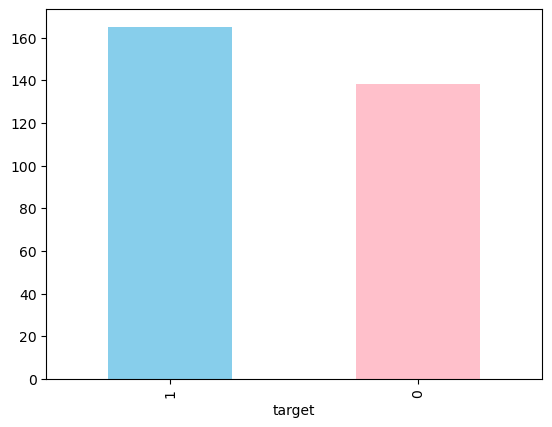

In [9]:
# EDA -- Exploratory data analysis

df['target'].value_counts().plot(kind='bar',color=['skyblue','pink']);
plt.show()

In [10]:
t=pd.crosstab(df.sex,df.target)
t

target,0,1
sex,,
0,24,72
1,114,93


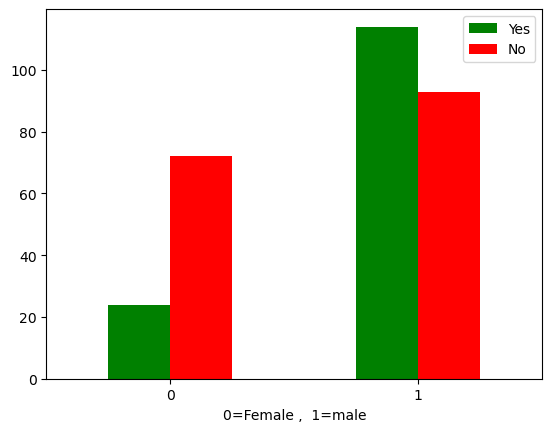

In [11]:
t.plot(kind='bar',color=['green','red'])
plt.xlabel('0=Female ,  1=male')
plt.legend(['Yes','No']);
plt.xticks(rotation=0);
plt.show()
plt.close()

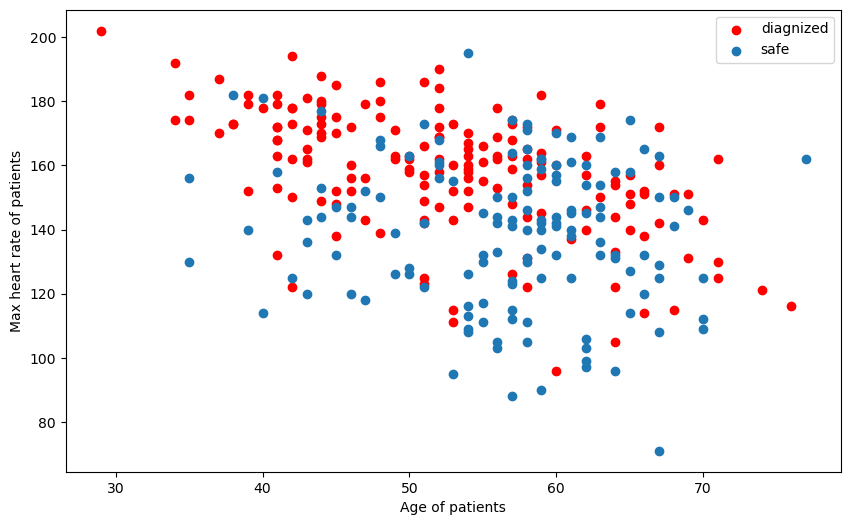

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='red');
plt.xlabel('Age of patients')
plt.ylabel('Max heart rate of patients')
plt.scatter(df.age[df.target==0],df.thalach[df.target==0]);
plt.legend(['diagnized','safe'])
plt.show()
            

In [13]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


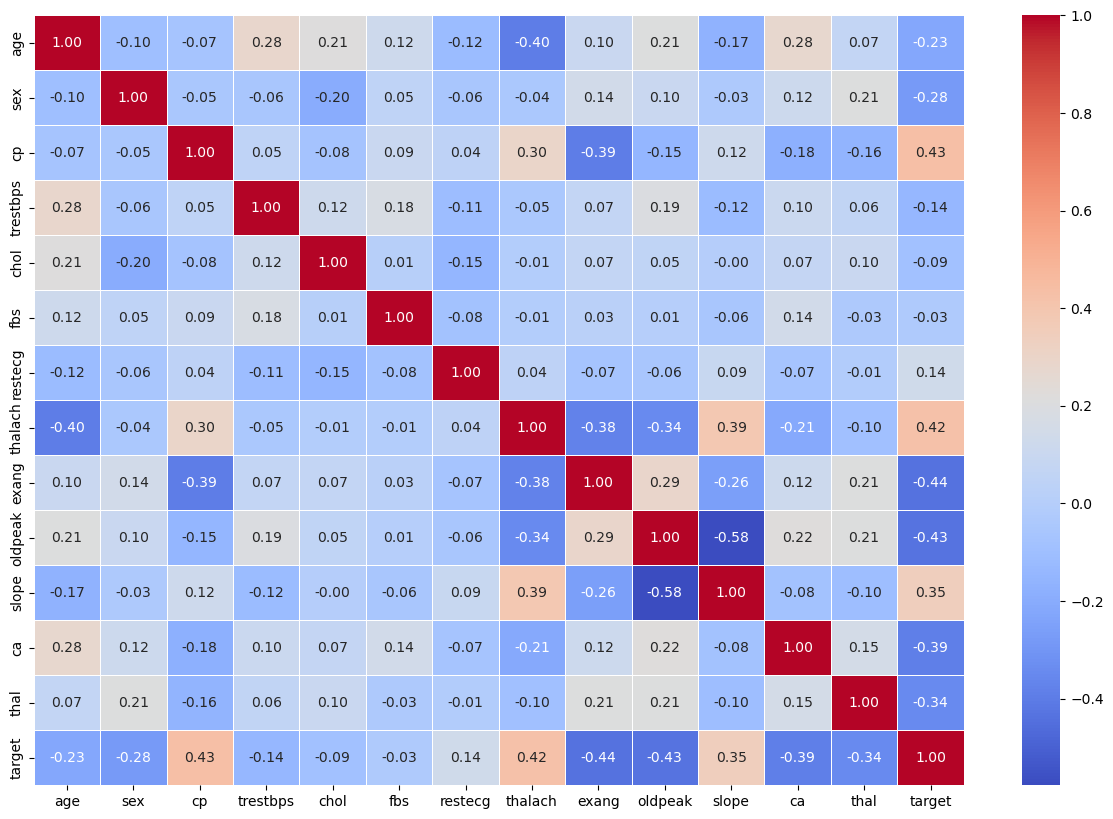

In [14]:
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True ,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='coolwarm'
)
plt.show()
plt.close()

In [15]:
x=df.drop('target',axis=1)
y=df['target']

np.random.seed(18)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

models = {'Logreg': LogisticRegression(),
          'knn': KNeighborsClassifier(),
          'Randomforest': RandomForestClassifier()
    }
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(18)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores


In [16]:
our_model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)
our_model_scores

C:\Users\ssrak\ai\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logreg': 0.8360655737704918,
 'knn': 0.6885245901639344,
 'Randomforest': 0.8524590163934426}

They tuned knn by hand through looping over knn.set_params(n_neighbours=i) and plotted to see for which i we get max accuracy


But i am moving to tuning using cvs to tune logistic reg nd randomforest model

##Hyperparameter tuning

In [17]:
lr_grid = {'C': np.logspace(-4,4,20),
          'solver':['liblinear'] }

rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}
                         

In [18]:
np.random.seed(18)
rs_lr_model = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions=lr_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)
rs_lr_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [19]:
rs_lr_model.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [20]:
rs_lr_model.score(x_test,y_test)

0.819672131147541

In [21]:
np.random.seed(18)
rs_rf_model = RandomizedSearchCV(RandomForestClassifier(),
                                 param_distributions=rf_grid,
                                 cv=5,
                                 n_iter=20,
                                 verbose=True)
rs_rf_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [22]:
rs_rf_model.best_params_

{'n_estimators': np.int64(610),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(5),
 'max_depth': 3}

In [23]:
rs_rf_model.score(x_test,y_test)

0.8688524590163934

In [24]:
our_model_scores

{'Logreg': 0.8360655737704918,
 'knn': 0.6885245901639344,
 'Randomforest': 0.8524590163934426}

In [25]:
log_reg_grid={'C': np.logspace(-4,4,30),
          'solver':['liblinear'] }
gs_lr_model=GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_lr_model.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [26]:
gs_lr_model.best_params_


{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [27]:
gs_lr_model.score(x_test,y_test)

0.8360655737704918

In [28]:
# {'n_estimators': np.int64(610),
#  'min_samples_split': np.int64(16),
#  'min_samples_leaf': np.int64(5),
#  'max_depth': 3}


ranfor_grid={'n_estimators': np.arange(610,1000,50),
           'max_depth': [None,3,5],
           'min_samples_split': [16],
             'max_features':['sqrt','log2'],
           'min_samples_leaf':[5]}
gs_rf_model=GridSearchCV(RandomForestClassifier(),
                         param_grid=ranfor_grid,
                         cv=5,verbose=True)
gs_rf_model.fit(x_train,y_train)	

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5], 'min_samples_split': [16],
                         'n_estimators': array([610, 660, 710, 760, 810, 860, 910, 960])},
             verbose=True)

In [29]:
gs_rf_model.score(x_test,y_test)

0.8688524590163934

In [30]:
log_reg_grid={'C': np.logspace(-4,4,30),
          'solver':['liblinear'] }
gs_lr_model=GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
gs_lr_model.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
gs_lr_model.score(x_test,y_test)

0.8360655737704918

In [32]:
y_preds = gs_lr_model.predict(x_test)

In [33]:
y_preds


array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [34]:
y_test

199    0
192    0
246    0
257    0
268    0
      ..
50     1
252    0
161    1
203    0
39     1
Name: target, Length: 61, dtype: int64

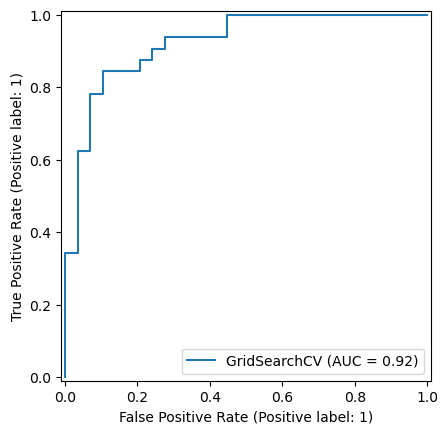

In [35]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_lr_model, x_test, y_test)
plt.show()

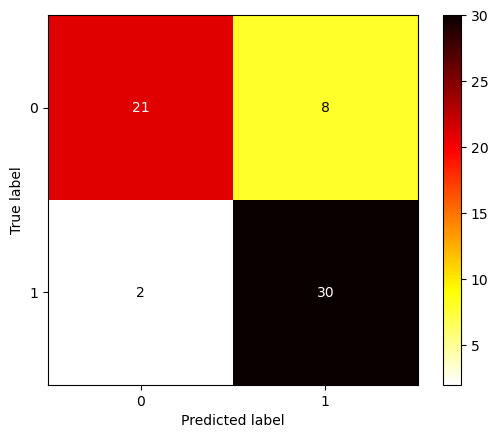

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gs_lr_model,x_test,y_test,cmap='hot_r')
plt.show()

In [37]:
gs_lr_model.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [38]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [39]:
cv_acc=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [40]:
cv_precision=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [41]:
cv_recall=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [42]:
cv_f1=cross_val_score(clf,
                       x,
                       y,
                       cv=5,
                       scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

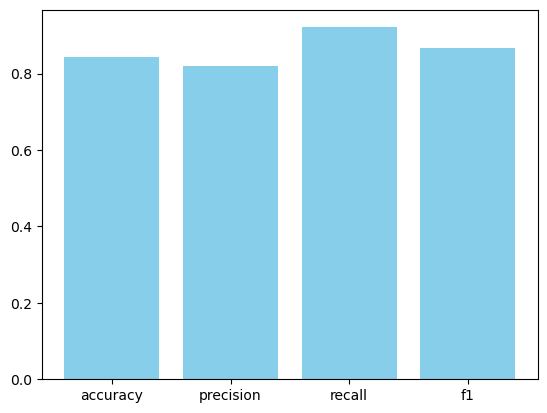

In [43]:
cv_matrix = {'accuracy':cv_acc,
             'precision':cv_precision,
             'recall':cv_recall,
             'f1': cv_f1}
plt.bar(cv_matrix.keys(),cv_matrix.values(),color='skyblue')
plt.show()

In [44]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [45]:
clf.coef_

array([[ 0.01684294, -0.90003619,  0.74487631, -0.01901002, -0.00256095,
        -0.06502769,  0.16858893,  0.0304437 , -0.54259852, -0.38637088,
         0.30829134, -0.61990508, -0.80599693]])

In [46]:
features_dict = dict(zip(df.columns,list(clf.coef_[0])))
features_dict

{'age': np.float64(0.016842944046961426),
 'sex': np.float64(-0.9000361949946601),
 'cp': np.float64(0.7448763069653376),
 'trestbps': np.float64(-0.01901001797171419),
 'chol': np.float64(-0.002560953195495222),
 'fbs': np.float64(-0.06502769147582707),
 'restecg': np.float64(0.16858892668956318),
 'thalach': np.float64(0.030443698947768053),
 'exang': np.float64(-0.542598515609168),
 'oldpeak': np.float64(-0.3863708816330882),
 'slope': np.float64(0.3082913435720714),
 'ca': np.float64(-0.6199050801352932),
 'thal': np.float64(-0.8059969330785868)}

In [47]:
features_df=pd.DataFrame(features_dict,index=[1])
features_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,0.016843,-0.900036,0.744876,-0.01901,-0.002561,-0.065028,0.168589,0.030444,-0.542599,-0.386371,0.308291,-0.619905,-0.805997


<Figure size 600x10000 with 0 Axes>

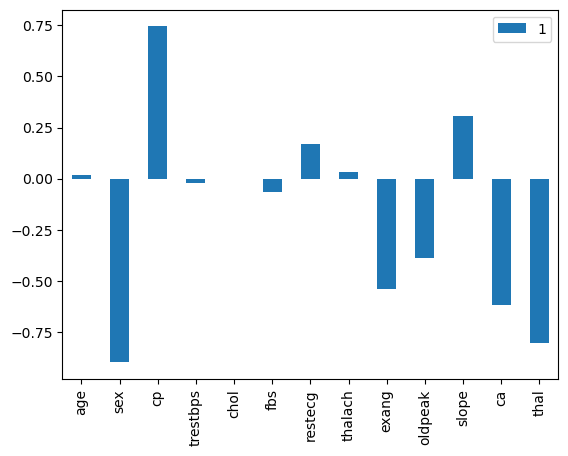

In [48]:
plt.figure(figsize=(6,100))
features_df.T.plot.bar()
# plt.xticks(rotation=0)
plt.show()